In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [300]:
gender_sub=pd.read_csv('gender_submission.csv')

In [301]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [302]:
train=pd.read_csv('train.csv')

In [303]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### checking missing values

In [304]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### features analysis

In [305]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [306]:
print('minimum age',train['Age'].min())
print('maximum age ',train['Age'].max())
print('average age',train['Age'].mean())

minimum age 0.42
maximum age  80.0
average age 29.69911764705882


In [307]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [308]:
train['Salutation']=0
for i in train:
    train['Salutation']=train.Name.str.extract('([A-Za-z]+)\.')

In [309]:
pd.crosstab(train.Salutation,train.Sex.count())

col_0,891
Salutation,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


In [310]:
train.groupby('Salutation')['Age'].mean()

Salutation
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

#### Filling age's missing values

In [311]:
train.loc[(train.Age.isnull())&(train.Salutation=='capt'),'Age']=70
train.loc[(train.Age.isnull())&(train.Salutation=='col'),'Age']=58
train.loc[(train.Age.isnull())&(train.Salutation=='countess'),'Age']=33
train.loc[(train.Age.isnull())&(train.Salutation=='Don'),'Age']=40
train.loc[(train.Age.isnull())&(train.Salutation=='Dr'),'Age']=42
train.loc[(train.Age.isnull())&(train.Salutation=='Jonkheer'),'Age']=38
train.loc[(train.Age.isnull())&(train.Salutation=='Lady'),'Age']=48
train.loc[(train.Age.isnull())&(train.Salutation=='Major'),'Age']=48
train.loc[(train.Age.isnull())&(train.Salutation=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Salutation=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Salutation=='Mlle'),'Age']=24
train.loc[(train.Age.isnull())&(train.Salutation=='Mme'),'Age']=24
train.loc[(train.Age.isnull())&(train.Salutation=='Mr'),'Age']=32
train.loc[(train.Age.isnull())&(train.Salutation=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Salutation=='Ms'),'Age']=28
train.loc[(train.Age.isnull())&(train.Salutation=='Rev'),'Age']=43
train.loc[(train.Age.isnull())&(train.Salutation=='Sir'),'Age']=49

In [312]:
train.Age.isnull().sum()

0

No Null values Left


### Filling Embarked missing values

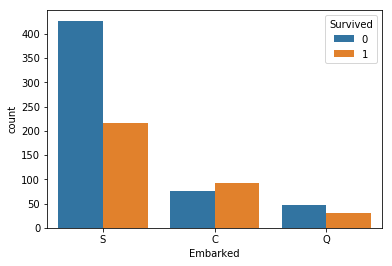

In [313]:
sns.countplot('Embarked',hue='Survived',data=train)


 As we can notice, most of the passengers are embarked from S port. So we replace NaN with S.

In [314]:
train['Embarked'].fillna('S',inplace=True)

In [315]:
train.Embarked.isnull().sum()

0

# data analysis

## Survived

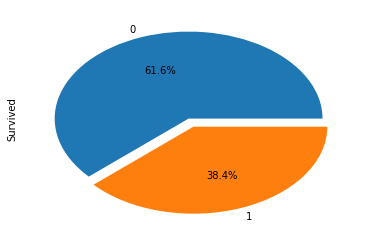

In [316]:
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

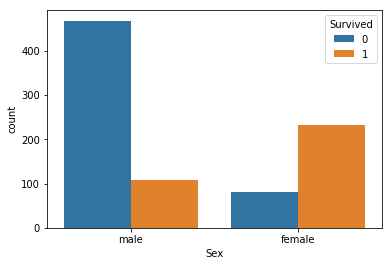

In [317]:
sns.countplot('Sex',hue='Survived',data=train)

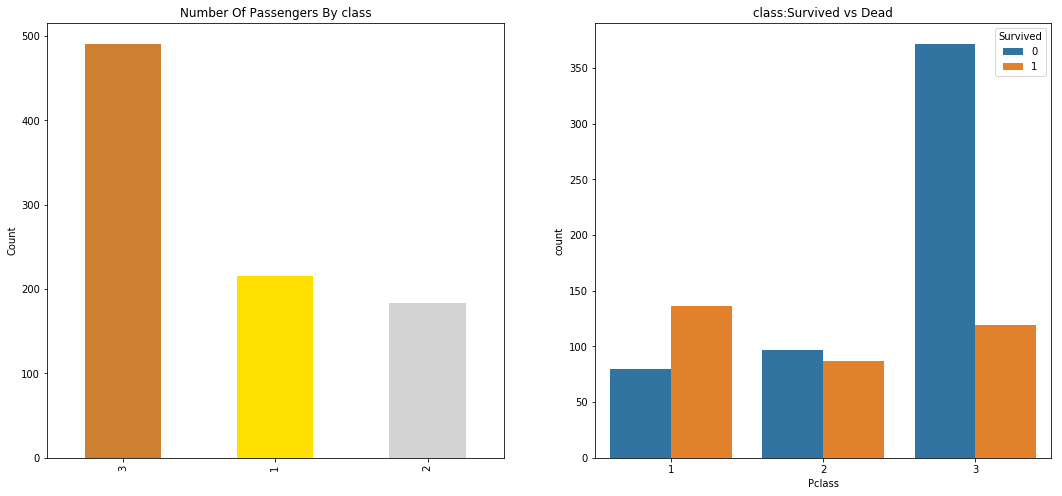

In [318]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('class:Survived vs Dead')
plt.show()

Text(0.5,1,'Survived: Sex vs Social Class')

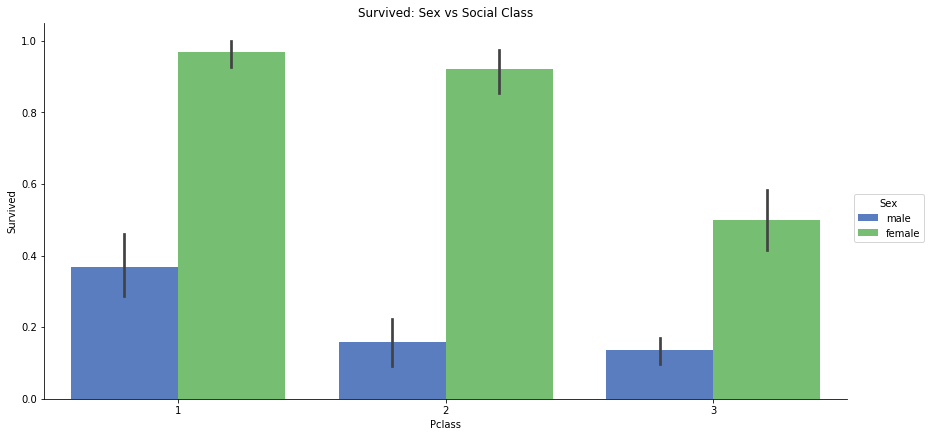

In [319]:
sns.factorplot("Pclass", "Survived", "Sex", data=train, kind="bar", size=6, aspect=2, palette="muted")
plt.title("Survived: Sex vs Social Class")

we can easily infer that survival for Women from Pclass1 is about 95-96%

as first insight, we may say that the social class, the age and the sex are important features in our prediction

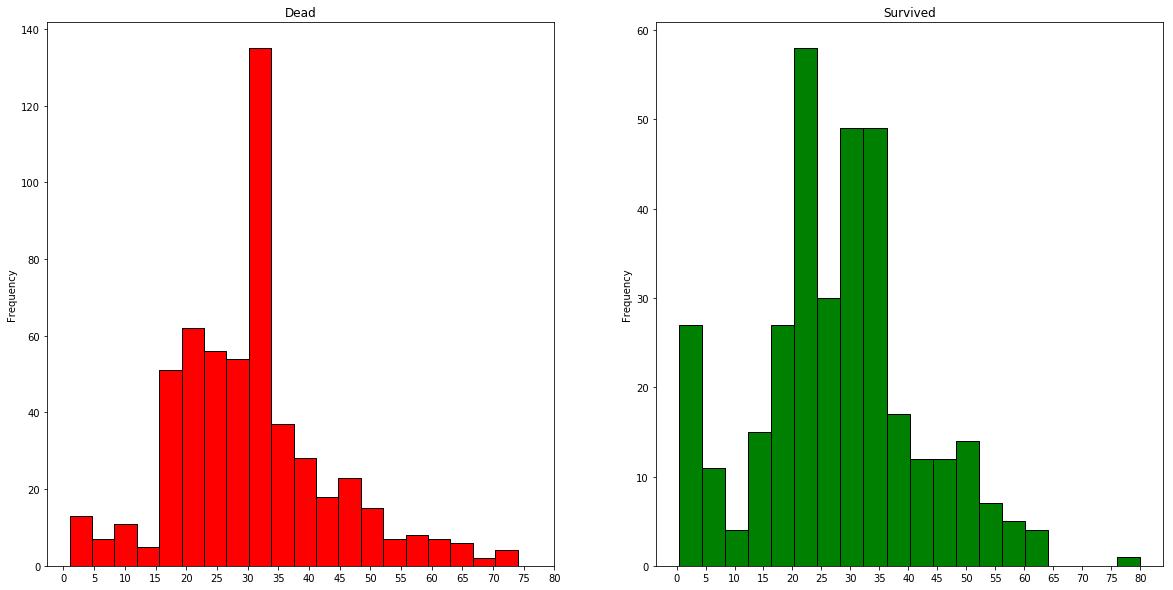

In [320]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Dead')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

The children that age <5 were saved in large numbers.
Maximum number of deaths were in the age group of 30-35.

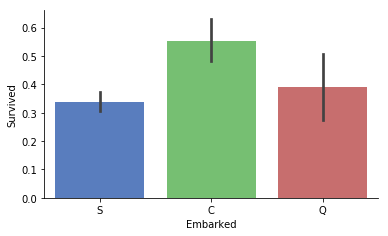

In [321]:
sns.factorplot('Embarked','Survived',data=train, kind="bar", size=6, aspect=2, palette="muted")
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Text(0.5,1,'Embarked vs Social class')

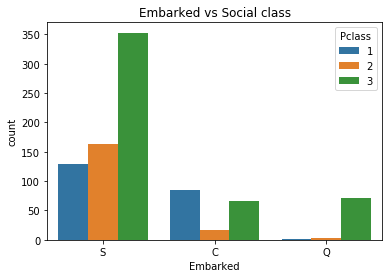

In [322]:
sns.countplot('Embarked',hue='Pclass',data=train)
plt.title('Embarked vs Social class')

Maximum passenegers boarded from S. Majority of them being from Pclass3. Besides they have the lowest chance to survive

In [323]:
pd.crosstab([train.SibSp],train.Survived)


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


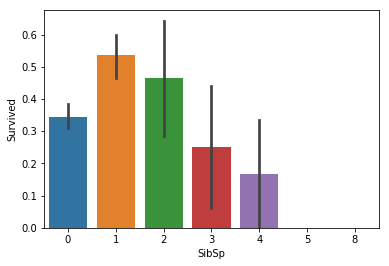

In [324]:
sns.barplot('SibSp','Survived',data=train)

Text(0.5,1,'Survived: Family vs Social Class')

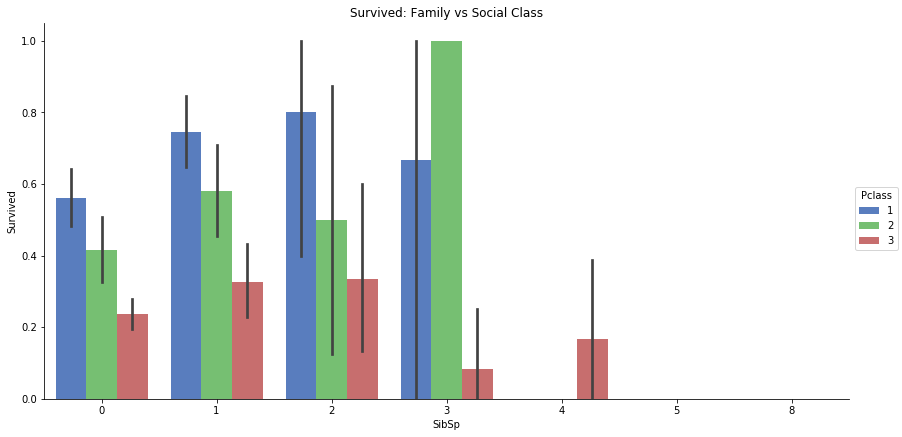

In [325]:
sns.factorplot("SibSp", "Survived", "Pclass", data=train, kind="bar", size=6, aspect=2, palette="muted")
plt.title("Survived: Family vs Social Class")

if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase and the survival for families with 5-8 members is 0%. the Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

Text(0.5,1,'Parch vs Survived')

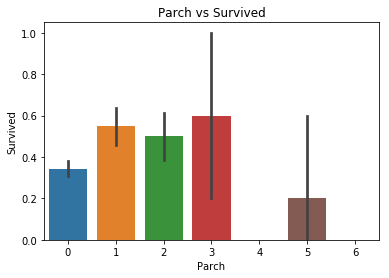

In [326]:
sns.barplot('Parch','Survived',data=train)
plt.title('Parch vs Survived')

Passengers with their parents onboard have greater chance of survival. But it reduces as the number goes up.

## Correlation between features

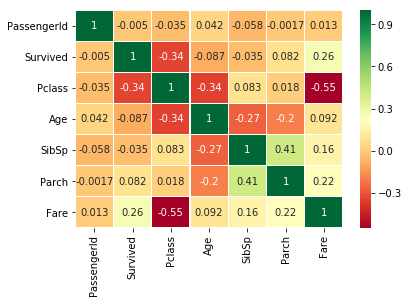

In [327]:
mask=sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


Positive Correlation Features:


Fare and Survived: 0.26 
Parch and survived : 0.082


Negative Correlation Features:


Fare and Pclass: -0.55
Pclass and Survived: -0.34

#### Adding sex feature by replacing categorical values to numerical values

In [328]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)

In [329]:
train['child'] = [1 if i<16 else 0 for i in train.Age]

In [330]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1

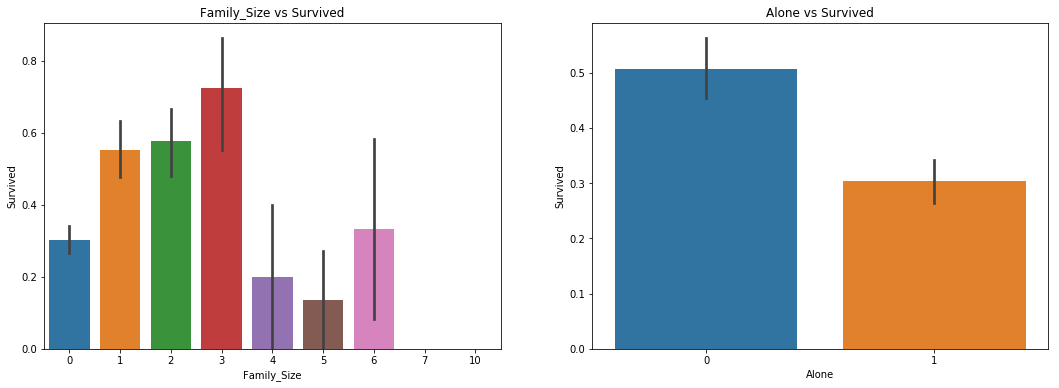

In [331]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train,kind='bar',ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train,kind='bar',ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [332]:
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [333]:
train.drop(['Name','Ticket','Cabin','PassengerId','Fare','Salutation'],axis=1,inplace=True)

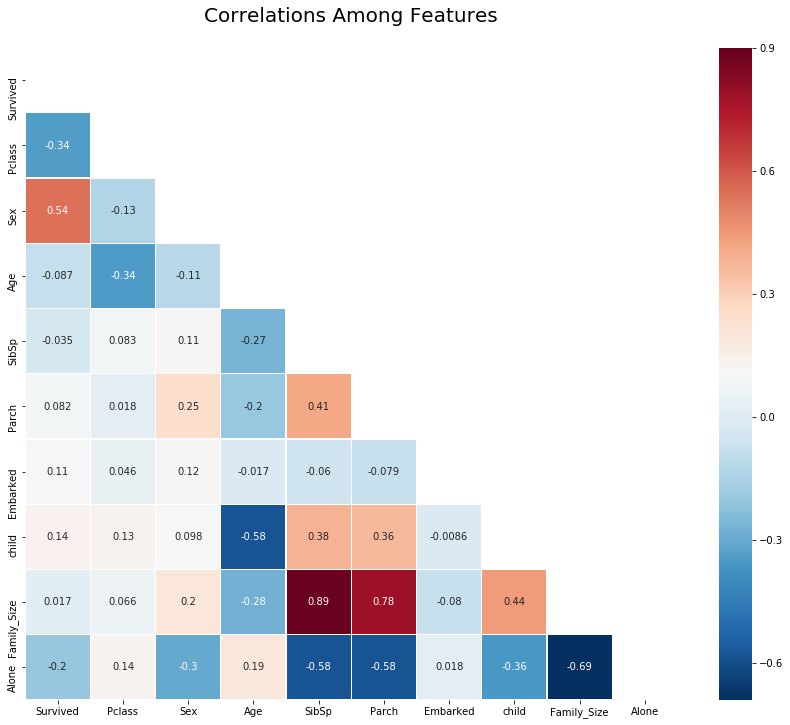

In [334]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

In [335]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,child,Family_Size,Alone
0,0,3,0,22.0,1,0,0,0,1,0
1,1,1,1,38.0,1,0,1,0,1,0
2,1,3,1,26.0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,0,0,1,0
4,0,3,0,35.0,0,0,0,0,0,1
5,0,3,0,32.0,0,0,2,0,0,1
6,0,1,0,54.0,0,0,0,0,0,1
7,0,3,0,2.0,3,1,0,1,4,0
8,1,3,1,27.0,0,2,0,0,2,0
9,1,2,1,14.0,1,0,1,1,1,0


In [336]:
test=pd.read_csv('test.csv')

In [337]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [338]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [339]:
test['Salutation']=0
for i in test:
    test['Salutation']=test.Name.str.extract('([A-Za-z]+)\.')

In [340]:
test.loc[(test.Age.isnull())&(test.Salutation=='capt'),'Age']=70
test.loc[(test.Age.isnull())&(test.Salutation=='col'),'Age']=58
test.loc[(test.Age.isnull())&(test.Salutation=='countess'),'Age']=33
test.loc[(test.Age.isnull())&(test.Salutation=='Don'),'Age']=40
test.loc[(test.Age.isnull())&(test.Salutation=='Dr'),'Age']=42
test.loc[(test.Age.isnull())&(test.Salutation=='Jonkheer'),'Age']=38
test.loc[(test.Age.isnull())&(test.Salutation=='Lady'),'Age']=48
test.loc[(test.Age.isnull())&(test.Salutation=='Major'),'Age']=48
test.loc[(test.Age.isnull())&(test.Salutation=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Salutation=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Salutation=='Mlle'),'Age']=24
test.loc[(test.Age.isnull())&(test.Salutation=='Mme'),'Age']=24
test.loc[(test.Age.isnull())&(test.Salutation=='Mr'),'Age']=32
test.loc[(test.Age.isnull())&(test.Salutation=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Salutation=='Ms'),'Age']=28
test.loc[(test.Age.isnull())&(test.Salutation=='Rev'),'Age']=43
test.loc[(test.Age.isnull())&(test.Salutation=='Sir'),'Age']=49

In [341]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Salutation       0
dtype: int64

In [342]:
test['Family_Size']=0
test['Family_Size']=test['Parch']+test['SibSp']
test['Alone']=0
test.loc[test.Family_Size==0,'Alone']=1

In [343]:
test['Sex'].replace(['male','female'],[0,1],inplace=True)

In [344]:
test['child'] = [1 if i<16 else 0 for i in test.Age]

In [345]:
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [346]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Family_Size,Alone,child
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Mr,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Mrs,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Mr,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Mr,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Mrs,2,0,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0,Mr,0,1,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,Miss,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0,Mr,2,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1,Mrs,0,1,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0,Mr,2,0,0


In [347]:
test.drop(['Name','Ticket','Cabin','PassengerId','Fare','Salutation'],axis=1,inplace=True)

In [348]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,child,Family_Size,Alone
0,0,3,0,22.0,1,0,0,0,1,0
1,1,1,1,38.0,1,0,1,0,1,0
2,1,3,1,26.0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,0,0,1,0
4,0,3,0,35.0,0,0,0,0,0,1
5,0,3,0,32.0,0,0,2,0,0,1
6,0,1,0,54.0,0,0,0,0,0,1
7,0,3,0,2.0,3,1,0,1,4,0
8,1,3,1,27.0,0,2,0,0,2,0
9,1,2,1,14.0,1,0,1,1,1,0


In [349]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,Alone,child
0,3,0,34.5,0,0,2,0,1,0
1,3,1,47.0,1,0,0,1,0,0
2,2,0,62.0,0,0,2,0,1,0
3,3,0,27.0,0,0,0,0,1,0
4,3,1,22.0,1,1,0,2,0,0
5,3,0,14.0,0,0,0,0,1,1
6,3,1,30.0,0,0,2,0,1,0
7,2,0,26.0,1,1,0,2,0,0
8,3,1,18.0,0,0,1,0,1,0
9,3,0,21.0,2,0,0,2,0,0


## Prediction Modeling

the problem is to predict if the passenger will die or not. So it is a classification problem

In [350]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [351]:
from sklearn.model_selection import train_test_split 
train1,test1=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train1[train1.columns[1:]]
train_Y=train1[train1.columns[:1]]
test_X=test1[test1.columns[1:]]
test_Y=test1[test1.columns[:1]]
X=train1[train1.columns[1:]]
Y=train1['Survived']

## Support vector machine SVM rbf

In [361]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.05)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8208955223880597


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Support vector machine linear

In [353]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.05)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for linear SVM is 0.7985074626865671


## Logistic regression

In [354]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8246268656716418


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-NN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

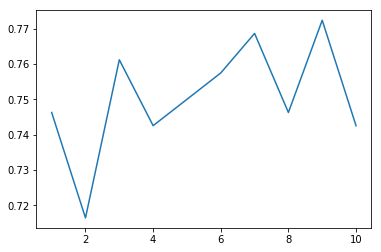

In [355]:

acc=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(range(1,11), acc)
plt.show()

In [358]:
model=KNeighborsClassifier(n_neighbors=9) 
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the KNN is 0.7723880597014925


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [362]:
from sklearn.model_selection import cross_val_predict

Text(0.5,1,'Matrix for Logistic Regression')

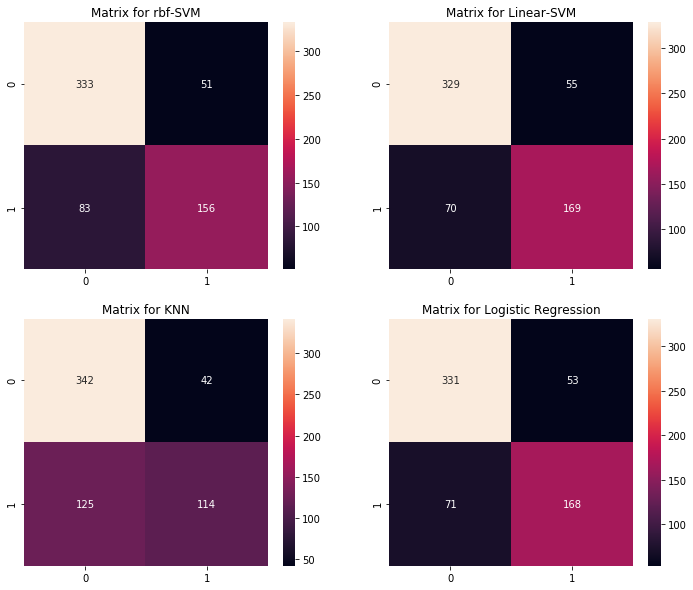

In [381]:
f,ax=plt.subplots(2,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
